### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Data Exploration and Visualization


In [2]:
data=pd.read_csv('dataset.csv')


In [3]:
data.head(5)


,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No


This is the dataset from a e-commerce website. The dataset contains the information about the user's behavior on the website whether they will return the product or not. This dataset contains the following attributes:

1. Userid : This is the unique identifier for the user.
2. Orderid : This is the unique identifier for the order.
3. OrderValue: This represents the total value of the order.
4. PaymentType: This represents the payment type of the order whether the payment is made through credit card or debit card or cash on delivery or mobile payment.
5. District: This represents the district of the user.
6. OrderType: This describes whether the order is normal order of fast order.
7. DeliveryCharge: This represents the delivery charge of the order.
8. OrderPlacedDay: This represents the day of the order placement.
9.OrderConfirmDayOverPhone: This represents the day of the order confirmation over phone.
10. IsCartOrder: This represents whether the order is cart order or not as people leave the product in the cart and return later to purchase the product.
11. OrderFromPromotionalEvent: This represents whether the order is from promotional event or not.
12. CourierService: This represents the courier service platform of the order
13. IsRTO: This represents whether the order is returned to origin or not. 

Here is our target is to predict whether the order will be returned or not. So, Our target variable is 'IsRTO'.




In [4]:
data.describe()


,OrderId,UserId,OrderValue,DeliveryCharge,courierService
count,1.000000e+04,10000.000000,10000.00000,9999.000000,0.0
mean,2.539235e+06,760484.345100,336.97160,33.782678,NaN
std,9.560667e+03,244170.093658,435.38002,24.795291,NaN
min,2.522672e+06,83.000000,0.00000,0.000000,NaN
25%,2.531893e+06,616375.750000,160.00000,25.000000,NaN
50%,2.538966e+06,883312.000000,230.00000,25.000000,NaN
75%,2.546397e+06,950553.000000,386.25000,55.000000,NaN
max,2.562691e+06,961083.000000,12800.00000,500.000000,NaN


This is the statistical summary of the dataset. This shows the mean, median, standard deviation, minimum, maximum, and the count of the numerical attributes in the dataset.


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderId                    10000 non-null  int64  
 1   UserId                     10000 non-null  int64  
 2   OrderValue                 10000 non-null  int64  
 3   PaymentType                10000 non-null  object 
 4   District                   10000 non-null  object 
 5   OrderSource                10000 non-null  object 
 6   OrderType                  9583 non-null   object 
 7   DeliveryCharge             9999 non-null   float64
 8   OrderPlacedDay             10000 non-null  object 
 9   OrderConfirmDayOverPhone   10000 non-null  object 
 10  IsCartOrder                10000 non-null  object 
 11  OrderFromPromotionalEvent  10000 non-null  object 
 12   courierService            0 non-null      float64
 13  isRTO                      10000 non-null  obje

This shows the information about the dataset. This shows the number of non-null values in the dataset.


In [6]:
data.columns

Index(['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District',
       'OrderSource', 'OrderType', 'DeliveryCharge', 'OrderPlacedDay',
       'OrderConfirmDayOverPhone', 'IsCartOrder', 'OrderFromPromotionalEvent',
       ' courierService ', 'isRTO'],
      dtype='object')

In [7]:
data = data.drop(columns=[' courierService '],axis=1)

Here, we are dropping the ' courierService ' column because it has only null values. It doesn't contain any value to this project.


In [8]:
data = data.drop(columns=['OrderId', 'UserId'], axis=1)

Here, we are dropping the 'OrderId' and 'UserId' columns because they are not required for this project.


In [9]:
data.columns

Index(['OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType',
       'DeliveryCharge', 'OrderPlacedDay', 'OrderConfirmDayOverPhone',
       'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderValue                 10000 non-null  int64  
 1   PaymentType                10000 non-null  object 
 2   District                   10000 non-null  object 
 3   OrderSource                10000 non-null  object 
 4   OrderType                  9583 non-null   object 
 5   DeliveryCharge             9999 non-null   float64
 6   OrderPlacedDay             10000 non-null  object 
 7   OrderConfirmDayOverPhone   10000 non-null  object 
 8   IsCartOrder                10000 non-null  object 
 9   OrderFromPromotionalEvent  10000 non-null  object 
 10  isRTO                      10000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 859.5+ KB


In [11]:
data.isnull().sum()


OrderValue                     0
PaymentType                    0
District                       0
OrderSource                    0
OrderType                    417
DeliveryCharge                 1
OrderPlacedDay                 0
OrderConfirmDayOverPhone       0
IsCartOrder                    0
OrderFromPromotionalEvent      0
isRTO                          0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderValue                 10000 non-null  int64  
 1   PaymentType                10000 non-null  object 
 2   District                   10000 non-null  object 
 3   OrderSource                10000 non-null  object 
 4   OrderType                  9583 non-null   object 
 5   DeliveryCharge             9999 non-null   float64
 6   OrderPlacedDay             10000 non-null  object 
 7   OrderConfirmDayOverPhone   10000 non-null  object 
 8   IsCartOrder                10000 non-null  object 
 9   OrderFromPromotionalEvent  10000 non-null  object 
 10  isRTO                      10000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 859.5+ KB


Now, we have total 11 columns and 9582 rows in the dataset and no null values are present in the dataset.


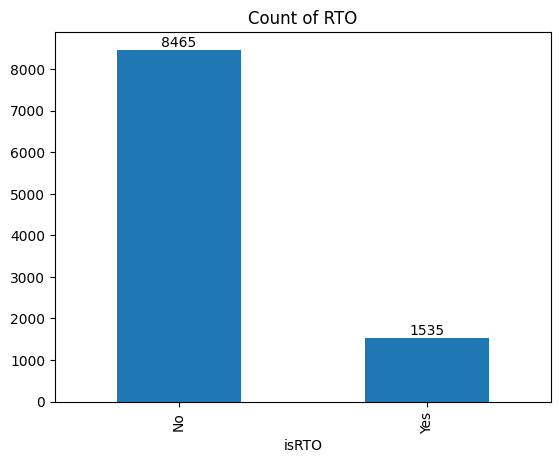

In [13]:
counts = data['isRTO'].value_counts()
counts.plot(kind='bar')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Count of RTO')
plt.show()

From the above graph, we can see that the number of orders that are returned to origin is less than the number of orders that are not returned to origin. So, majority of the orders are not returned to origin. But we need to identify the factors that are responsible for the returned orders so that we can take action to prevent the returned orders or minimize the returned orders.


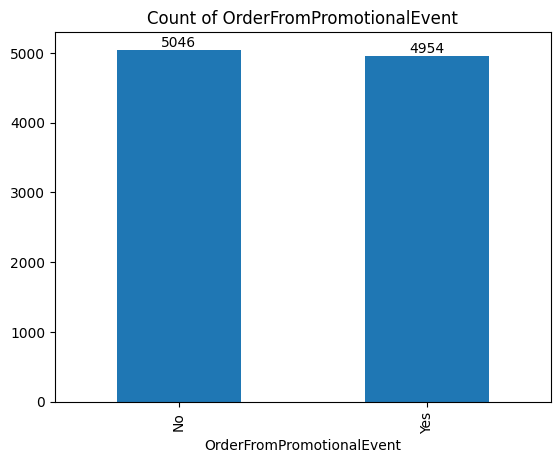

In [14]:
counts = data['OrderFromPromotionalEvent'].value_counts()
counts.plot(kind='bar')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Count of OrderFromPromotionalEvent')
plt.show()



From the above graph, we can see that the number of orders that are from promotional event is less than the number of orders that are not from promotional event. So, majority of the orders are not from promotional event. But the thing is that the number of orders that are from promotional event is not that much. So, we can say that the promotional event is not a major factor for the returned orders.


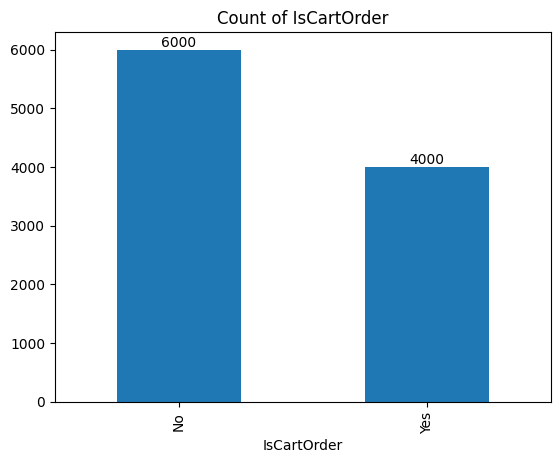

In [15]:
counts = data['IsCartOrder'].value_counts()
counts.plot(kind='bar')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Count of IsCartOrder')
plt.show()



From the above graph, we can see that the number of orders that are cart orders is less than the number of orders that are not cart orders. So, majority of the orders are not cart orders. But the thing is that the number of orders that are cart orders is not that much. So, we can say that the cart orders are not a major factor for the returned orders. People search for the product and buy it rather than adding to the cart and buying it later.


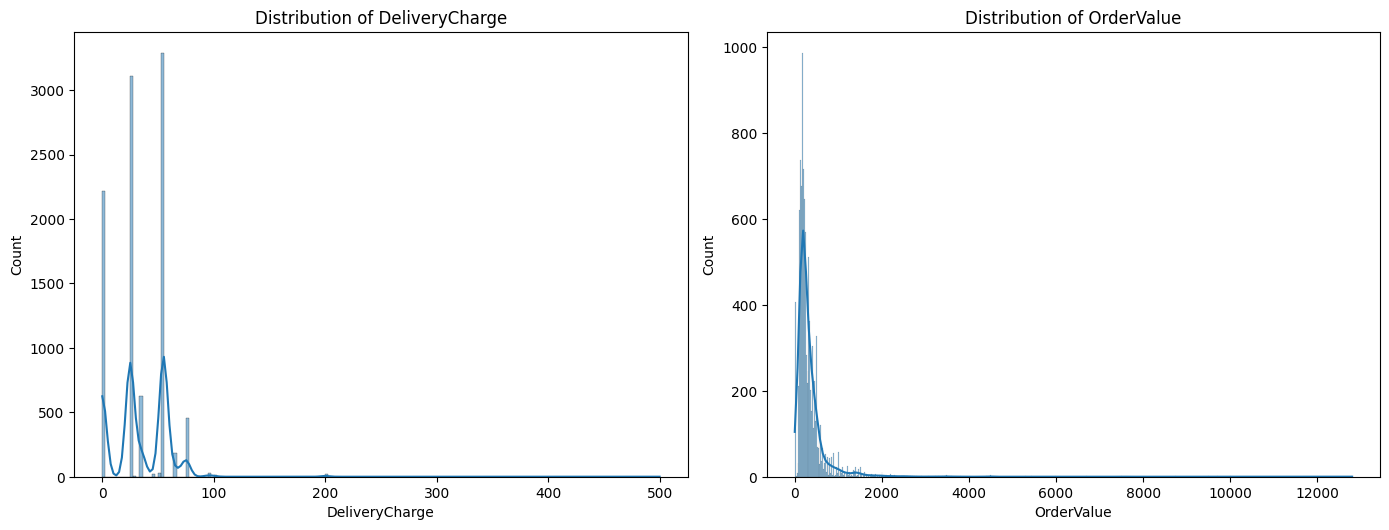

In [16]:
# Select columns
numerical_cols = ["DeliveryCharge", "OrderValue"]
# Plot
plt.figure(figsize=(14, 10))

# Numerical distributions
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

This shows the distribution of the 'DeliveryCharge' and 'OrderValue' columns. We can see that the 'DeliveryCharge' is right skewed and the 'OrderValue' is left skewed. Also, we can see that the 'DeliveryCharge' is more than the 'OrderValue' in most of the cases. So, we can say that the delivery charge is a major factor for the returned orders.


In [17]:
data['OrderPlacedDay'] = pd.to_datetime(data['OrderPlacedDay'])
data['OrderConfirmDayOverPhone'] = pd.to_datetime(data['OrderConfirmDayOverPhone'])

data['OrderTakingTime'] = (data['OrderConfirmDayOverPhone'].dt.date - data['OrderPlacedDay'].dt.date).apply(lambda x: x.days)
data.head()


,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,isRTO,OrderTakingTime
0,168,MPD,Dhaka,android,normal,25.0,2019-06-26 09:20:00,2019-06-26 03:30:00,No,Yes,No,0
1,240,MPD,Dhaka,mobile-site,normal,35.0,2019-06-25 19:05:00,2019-06-25 13:40:00,No,Yes,No,0
2,120,MPD,Dhaka,desktop,normal,35.0,2019-06-25 15:28:00,2019-06-25 09:27:00,No,Yes,Yes,0
3,185,MPD,Dhaka,android,normal,25.0,2019-06-25 13:27:00,2019-06-25 07:27:00,Yes,No,No,0
4,201,MPD,Dhaka,android,normal,25.0,2019-06-25 12:13:00,2019-06-25 06:56:00,No,Yes,No,0


Here, we are creating a new column 'OrderTakingTime' which is the difference between the 'OrderConfirmDayOverPhone' and 'OrderPlacedDay' columns. It is important to note that the 'OrderTakingTime' is not the time taken to confirm the order. It is the time taken to confirm the order over phone. This feature is important as it shows the time taken to confirm the order over phone. The time taken to confirm the order over phone is a major factor for the returned orders. If the time taken to confirm the order over phone is more than 1 day, then the order is more likely to be returned.


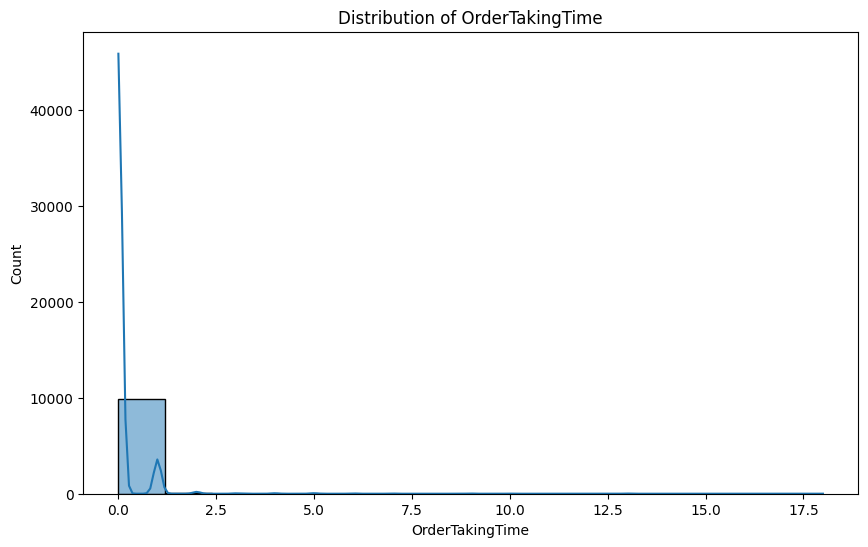

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['OrderTakingTime'], kde=True)
plt.title("Distribution of OrderTakingTime")
plt.show()

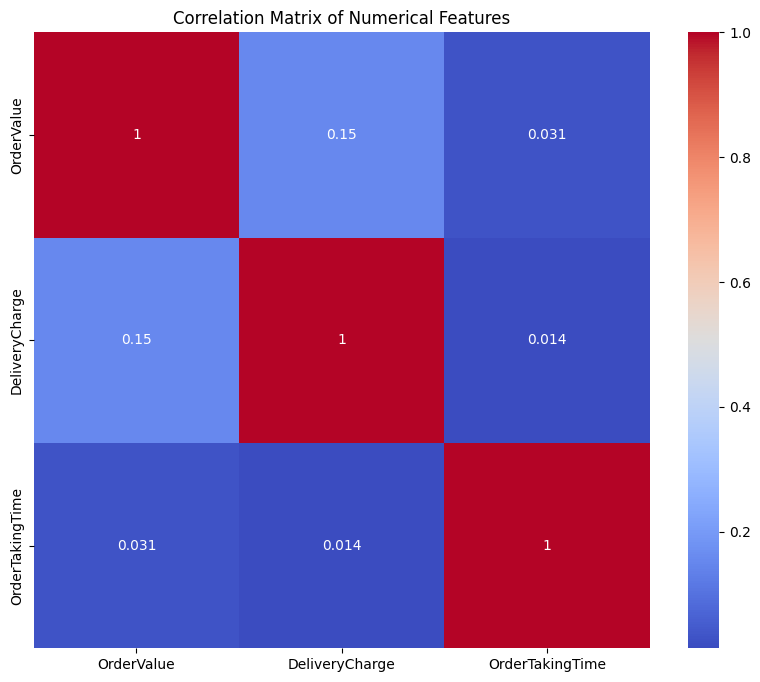

In [19]:
numerical_features = ['OrderValue', 'DeliveryCharge', 'OrderTakingTime']
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


This is the initial correlation matrix of the numerical features. We can see that the 'OrderValue' and 'DeliveryCharge' are positively correlated. The 'OrderTakingTime' is negatively correlated with the 'OrderValue' and 'DeliveryCharge'. Next we are going to see the correlation matrix after encoding the categorical features.


### Data Preprocessing


In [20]:
data.isnull().sum()


OrderValue                     0
PaymentType                    0
District                       0
OrderSource                    0
OrderType                    417
DeliveryCharge                 1
OrderPlacedDay                 0
OrderConfirmDayOverPhone       0
IsCartOrder                    0
OrderFromPromotionalEvent      0
isRTO                          0
OrderTakingTime                0
dtype: int64

In [21]:
data = data.dropna(subset=['OrderType', 'DeliveryCharge'])

Here, we are dropping the rows where the 'OrderType' and 'DeliveryCharge' columns have null values.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderValue                 9582 non-null   int64         
 1   PaymentType                9582 non-null   object        
 2   District                   9582 non-null   object        
 3   OrderSource                9582 non-null   object        
 4   OrderType                  9582 non-null   object        
 5   DeliveryCharge             9582 non-null   float64       
 6   OrderPlacedDay             9582 non-null   datetime64[ns]
 7   OrderConfirmDayOverPhone   9582 non-null   datetime64[ns]
 8   IsCartOrder                9582 non-null   object        
 9   OrderFromPromotionalEvent  9582 non-null   object        
 10  isRTO                      9582 non-null   object        
 11  OrderTakingTime            9582 non-null   int64         
dtypes: datetime

In [23]:
data.isnull().sum()


OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
isRTO                        0
OrderTakingTime              0
dtype: int64

In [24]:
data = data.drop(columns=["OrderPlacedDay", "OrderConfirmDayOverPhone"])

We have dropped the 'OrderPlacedDay' and 'OrderConfirmDayOverPhone' columns because they are not required anymore because we have created a new column 'OrderTakingTime' which is the difference between the 'OrderConfirmDayOverPhone' and 'OrderPlacedDay' columns.

In [25]:
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts())



PaymentType
MPD                     8261
MPS                      890
ADC                      282
OPS                      148
EMI                        1
Name: count, dtype: int64
District
Dhaka                   3675
Gazipur                  470
Chittagong City          362
Dhaka (Outside City)     304
Comilla                  234
                        ... 
Narail                    23
Rajbari                   18
Rangamati                 16
Jhalokati                 14
Bandarban                  5
Name: count, Length: 69, dtype: int64
OrderSource
android        8559
mobile-site     685
desktop         338
Name: count, dtype: int64
OrderType
normal     8808
express     774
Name: count, dtype: int64
IsCartOrder
No     5720
Yes    3862
Name: count, dtype: int64
OrderFromPromotionalEvent
Yes    4860
No     4722
Name: count, dtype: int64
isRTO
No     8105
Yes    1477
Name: count, dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['District'] = le.fit_transform(data['District'])
data['isRTO'] = le.fit_transform(data['isRTO'])


We have performed label encoding on the 'District' and 'isRTO' columns


In [27]:
data.head()


,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,IsCartOrder,OrderFromPromotionalEvent,isRTO,OrderTakingTime
0,168,MPD,14,android,normal,25.0,No,Yes,0,0
1,240,MPD,14,mobile-site,normal,35.0,No,Yes,0,0
2,120,MPD,14,desktop,normal,35.0,No,Yes,1,0
3,185,MPD,14,android,normal,25.0,Yes,No,0,0
4,201,MPD,14,android,normal,25.0,No,Yes,0,0


In [28]:
# Perform one-hot encoding on categorical columns
categorical_columns = ['PaymentType', 'OrderSource', 'OrderType', 'IsCartOrder', 'OrderFromPromotionalEvent']
data = pd.get_dummies(data, columns=categorical_columns)

In [29]:
data.head()


,OrderValue,District,DeliveryCharge,isRTO,OrderTakingTime,PaymentType_ADC,PaymentType_EMI,PaymentType_MPD,PaymentType_MPS,PaymentType_OPS,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes
0,168,14,25.0,0,0,False,False,True,False,False,True,False,False,False,True,True,False,False,True
1,240,14,35.0,0,0,False,False,True,False,False,False,False,True,False,True,True,False,False,True
2,120,14,35.0,1,0,False,False,True,False,False,False,True,False,False,True,True,False,False,True
3,185,14,25.0,0,0,False,False,True,False,False,True,False,False,False,True,False,True,True,False
4,201,14,25.0,0,0,False,False,True,False,False,True,False,False,False,True,True,False,False,True


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9582 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   OrderValue                        9582 non-null   int64  
 1   District                          9582 non-null   int64  
 2   DeliveryCharge                    9582 non-null   float64
 3   isRTO                             9582 non-null   int64  
 4   OrderTakingTime                   9582 non-null   int64  
 5   PaymentType_ADC                   9582 non-null   bool   
 6   PaymentType_EMI                   9582 non-null   bool   
 7   PaymentType_MPD                   9582 non-null   bool   
 8   PaymentType_MPS                   9582 non-null   bool   
 9   PaymentType_OPS                   9582 non-null   bool   
 10  OrderSource_android               9582 non-null   bool   
 11  OrderSource_desktop               9582 non-null   bool   
 12  OrderSource

In [31]:
boolean_columns = data.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    data[column] = data[column].astype(int)

In [32]:
data.head()


,OrderValue,District,DeliveryCharge,isRTO,OrderTakingTime,PaymentType_ADC,PaymentType_EMI,PaymentType_MPD,PaymentType_MPS,PaymentType_OPS,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes
0,168,14,25.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
1,240,14,35.0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
2,120,14,35.0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
3,185,14,25.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,201,14,25.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1


Here, We have converted the boolean columns to numerical columns for the better understanding of the model.


In [33]:
data = data.drop('District', axis=1)

In [34]:
data.head()


,OrderValue,DeliveryCharge,isRTO,OrderTakingTime,PaymentType_ADC,PaymentType_EMI,PaymentType_MPD,PaymentType_MPS,PaymentType_OPS,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes
0,168,25.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
1,240,35.0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
2,120,35.0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
3,185,25.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,201,25.0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [35]:
# Identify numerical columns that need normalization
numerical_columns = ['OrderValue', 'DeliveryCharge', 'OrderTakingTime']

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display first few rows to verify normalization
print("Data after normalization:")
data.head()


Data after normalization:


,OrderValue,DeliveryCharge,isRTO,OrderTakingTime,PaymentType_ADC,PaymentType_EMI,PaymentType_MPD,PaymentType_MPS,PaymentType_OPS,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes
0,-0.383793,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,1,0,0,1
1,-0.219268,0.054160,0,-0.186318,0,0,1,0,0,0,0,1,0,1,1,0,0,1
2,-0.493476,0.054160,1,-0.186318,0,0,1,0,0,0,1,0,0,1,1,0,0,1
3,-0.344947,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,-0.308386,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,1,0,0,1


Here, We have normalized the numerical columns which are 'OrderValue', 'DeliveryCharge', 'OrderTakingTime'. We have only performed normalization on the numerical columns because the other columns are already encoded.


### Feature Engineering


In the previous section, we have performed feature engineering on the dataset. We have created a new column 'OrderTakingTime' which is the difference between the 'OrderConfirmDayOverPhone' and 'OrderPlacedDay' columns. We have also performed label encoding on the 'District' and 'isRTO' columns. We have also performed one-hot encoding on the categorical columns. We have also converted the boolean columns to numerical columns. We have also normalized the numerical columns.


Now, we are going to perform feature engineering on the dataset again. We are going to create a new column from "IsCartOrder_No", "IsCartOrder_Yes", "OrderFromPromotionalEvent_No", "OrderFromPromotionalEvent_Yes" columns to build a relationship from product from the cart and product from the promotional event. We need to see if customer waiting for the product to buy them from promotional event. The new column will be "OrderFromCartandEvent" and it will be a binary column.


In [36]:
data['OrderFromCartandEvent'] = 0 
data.loc[(data['IsCartOrder_Yes'] == 1) & (data['OrderFromPromotionalEvent_Yes'] == 1), 'OrderFromCartandEvent'] = 1
print("\nData after adding OrderFromCartandEvent column:")
data.head()


Data after adding OrderFromCartandEvent column:


,OrderValue,DeliveryCharge,isRTO,OrderTakingTime,PaymentType_ADC,PaymentType_EMI,PaymentType_MPD,PaymentType_MPS,PaymentType_OPS,OrderSource_android,OrderSource_desktop,OrderSource_mobile-site,OrderType_express,OrderType_normal,IsCartOrder_No,IsCartOrder_Yes,OrderFromPromotionalEvent_No,OrderFromPromotionalEvent_Yes,OrderFromCartandEvent
0,-0.383793,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
1,-0.219268,0.054160,0,-0.186318,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0
2,-0.493476,0.054160,1,-0.186318,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0
3,-0.344947,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0
4,-0.308386,-0.348604,0,-0.186318,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0


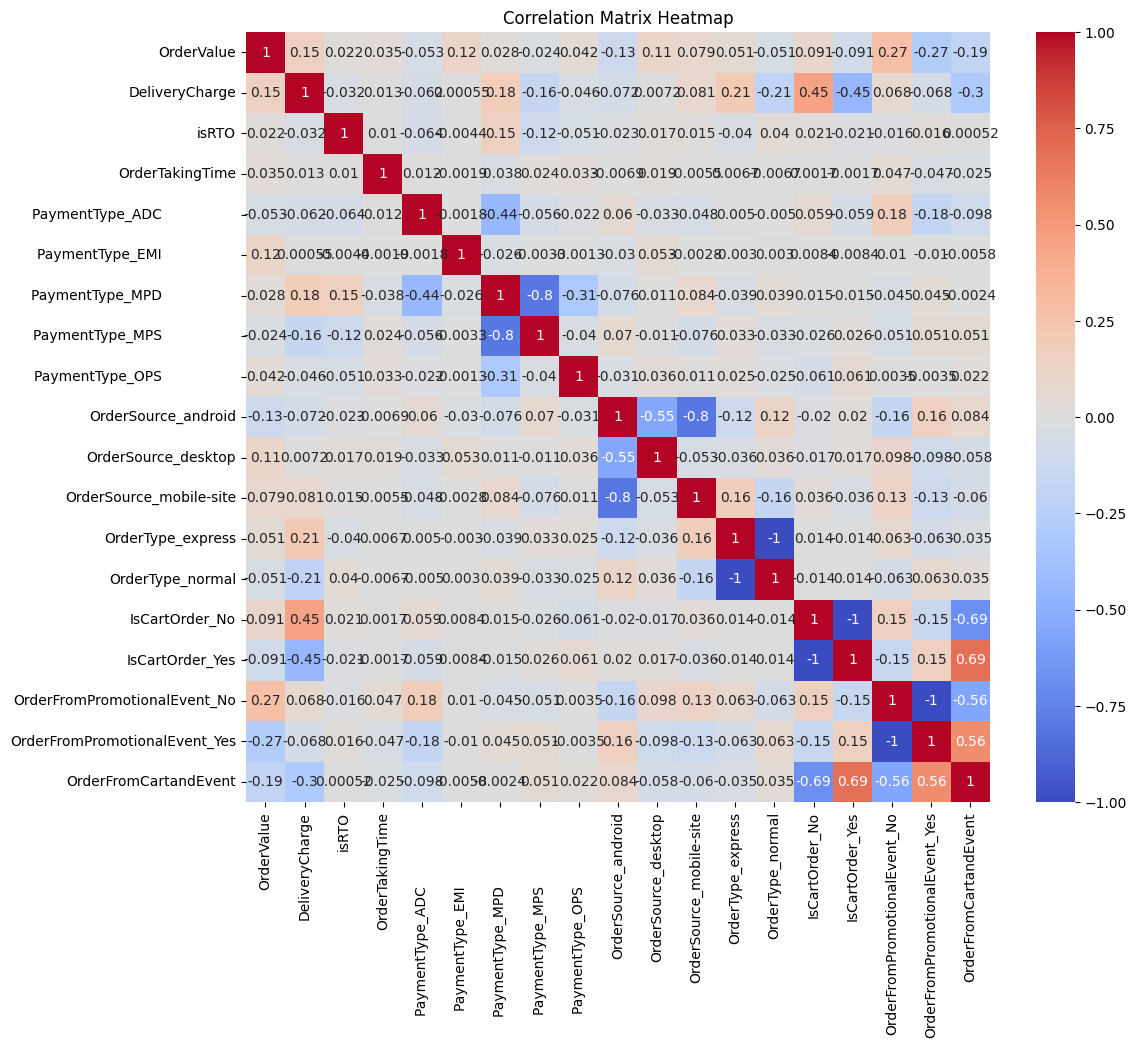


Correlations with isRTO:
isRTO                               1.000000
PaymentType_MPD                     0.151424
OrderType_normal                    0.039570
OrderValue                          0.021602
IsCartOrder_No                      0.021390
OrderSource_desktop                 0.017077
OrderFromPromotionalEvent_Yes       0.016108
OrderSource_mobile-site             0.015046
OrderTakingTime                     0.010479
OrderFromCartandEvent               0.000524
PaymentType_EMI                    -0.004361
OrderFromPromotionalEvent_No       -0.016108
IsCartOrder_Yes                    -0.021390
OrderSource_android                -0.022754
DeliveryCharge                     -0.031592
OrderType_express                  -0.039570
PaymentType_OPS                    -0.051125
PaymentType_ADC                    -0.064075
PaymentType_MPS                    -0.120668
Name: isRTO, dtype: float64


In [37]:
# Create correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Print correlations with isRTO specifically
print("\nCorrelations with isRTO:")
isrto_correlations = correlation_matrix['isRTO'].sort_values(ascending=False)
print(isrto_correlations)



In [38]:
# Remove specified features
columns_to_drop = ['OrderFromCartandEvent', 'OrderFromPromotionalEvent_No', 
                  'IsCartOrder_Yes', 'OrderSource_android', 'DeliveryCharge', 'OrderType_express']

data = data.drop(columns=columns_to_drop)


In [39]:
data.columns

Index(['OrderValue', 'isRTO', 'OrderTakingTime',
       'PaymentType_ADC                 ', 'PaymentType_EMI                 ',
       'PaymentType_MPD                 ', 'PaymentType_MPS                 ',
       'PaymentType_OPS                 ', 'OrderSource_desktop',
       'OrderSource_mobile-site', 'OrderType_normal', 'IsCartOrder_No',
       'OrderFromPromotionalEvent_Yes'],
      dtype='object')

In [40]:
# Drop specified payment type columns
columns_to_drop = ['PaymentType_ADC                 ', 'PaymentType_EMI                 ', 'PaymentType_OPS                 ']
data = data.drop(columns=columns_to_drop)


In [41]:
data.head()

,OrderValue,isRTO,OrderTakingTime,PaymentType_MPD,PaymentType_MPS,OrderSource_desktop,OrderSource_mobile-site,OrderType_normal,IsCartOrder_No,OrderFromPromotionalEvent_Yes
0,-0.383793,0,-0.186318,1,0,0,0,1,1,1
1,-0.219268,0,-0.186318,1,0,0,1,1,1,1
2,-0.493476,1,-0.186318,1,0,1,0,1,1,1
3,-0.344947,0,-0.186318,1,0,0,0,1,0,0
4,-0.308386,0,-0.186318,1,0,0,0,1,1,1


The features which have been removed exhibit very weak or negligible correlations with the target variable isRTO. Since these features provide minimal predictive value, retaining them would unnecessarily complicate the model without improving its performance. Dropping these columns helps simplify the model, reduce overfitting, and enhance both computational efficiency and interpretability, focusing on the most meaningful predictors for accurate predictions.

### Train-Test Split


In [42]:
X = data.drop('isRTO', axis=1)
y = data['isRTO']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7665, 9)
Testing set shape: (1917, 9)


### Model Building and Evaluation

### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       306

    accuracy                           0.84      1917
   macro avg       0.42      0.50      0.46      1917
weighted avg       0.71      0.84      0.77      1917



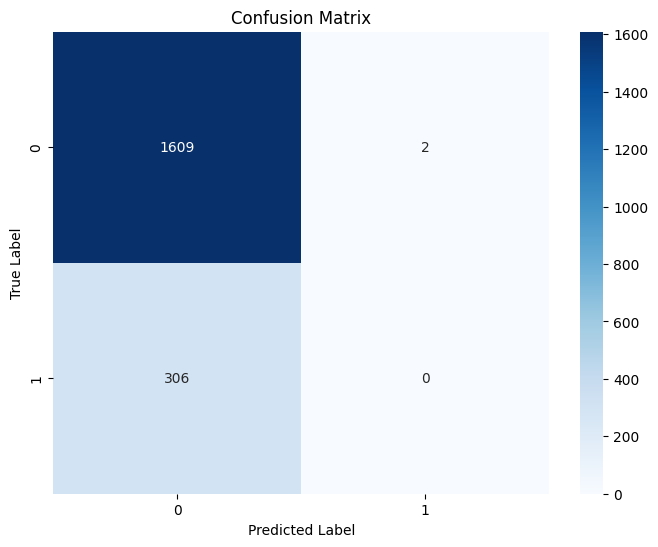

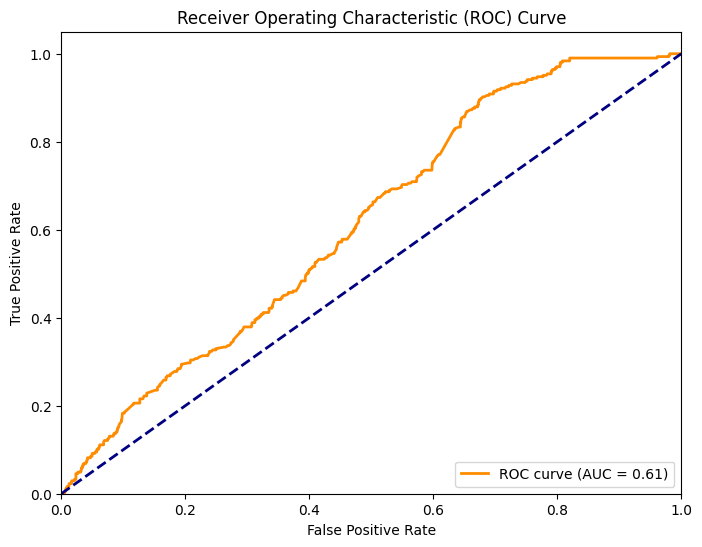

In [43]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:,1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This confusion matrix reveals a classification model that excels at identifying the negative class (label '0'), correctly classifying 1609 instances with only 2 false positives. However, it struggles significantly with the positive class (label '1'), failing to correctly identify any positive instances and misclassifying all 306 as negative. This suggests a strong bias towards predicting the negative class.

### K-Nearest Neighbors


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1611
           1       0.17      0.04      0.06       306

    accuracy                           0.82      1917
   macro avg       0.51      0.50      0.48      1917
weighted avg       0.73      0.82      0.77      1917



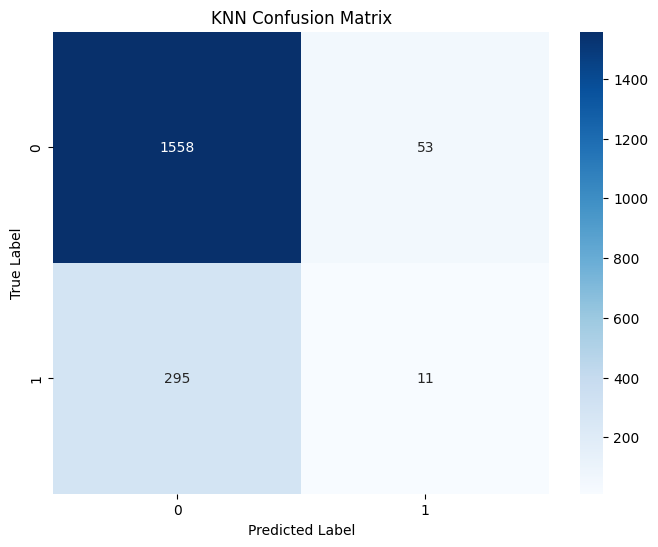

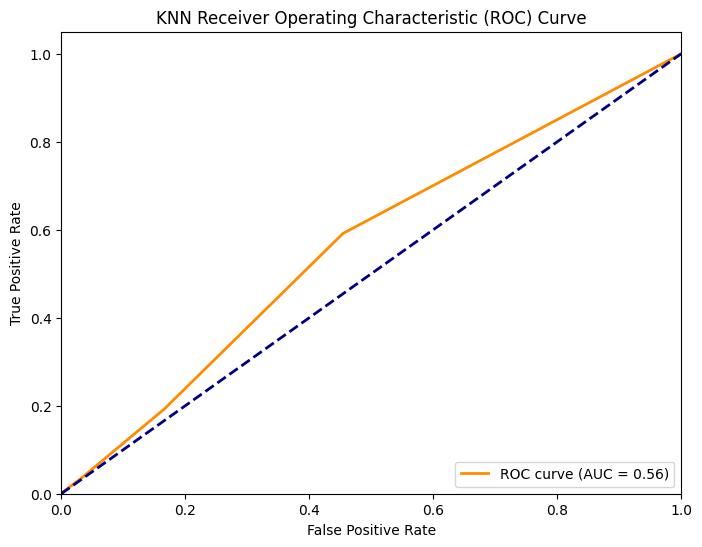

In [44]:
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:,1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This KNN confusion matrix shows how well the model performed in classifying two classes (0 and 1). It reveals that the model correctly predicted 1558 instances of class 0 (True Negatives) and 11 instances of class 1 (True Positives). However, it incorrectly predicted 53 instances of class 0 as class 1 (False Positives) and 295 instances of class 1 as class 0 (False Negatives). Overall, the KNN model appears to be much better at identifying class 0 than class 1, as evidenced by the higher number of true negatives compared to true positives and the larger number of false negatives compared to false positives.

### Decision Tree


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1611
           1       0.21      0.06      0.10       306

    accuracy                           0.81      1917
   macro avg       0.52      0.51      0.50      1917
weighted avg       0.74      0.81      0.77      1917



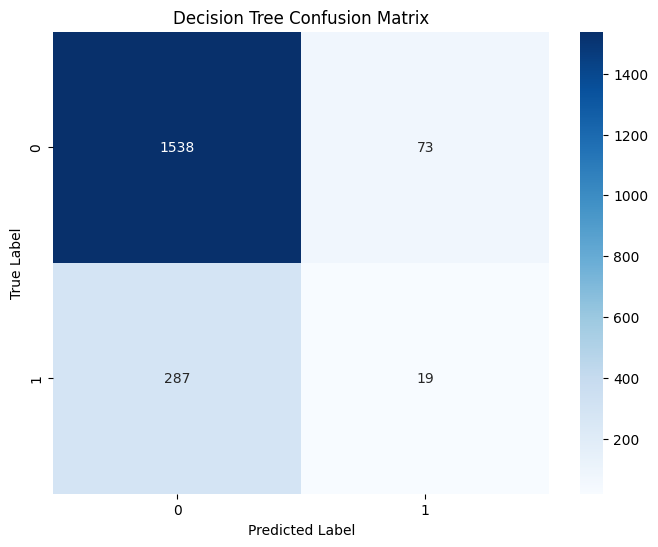

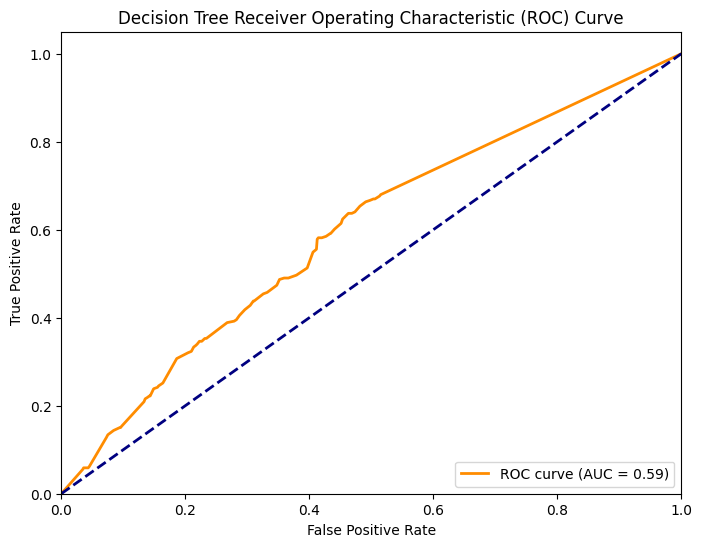

In [45]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:,1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This Decision Tree confusion matrix indicates that the model correctly classified 1538 instances of class 0 (True Negatives) and 19 instances of class 1 (True Positives). However, it made some errors, misclassifying 73 instances of class 0 as class 1 (False Positives) and 287 instances of class 1 as class 0 (False Negatives). Similar to the KNN model we just saw, this Decision Tree also appears to be better at predicting class 0 than class 1, given the larger count of true negatives and false negatives compared to true positives and false positives, respectively.

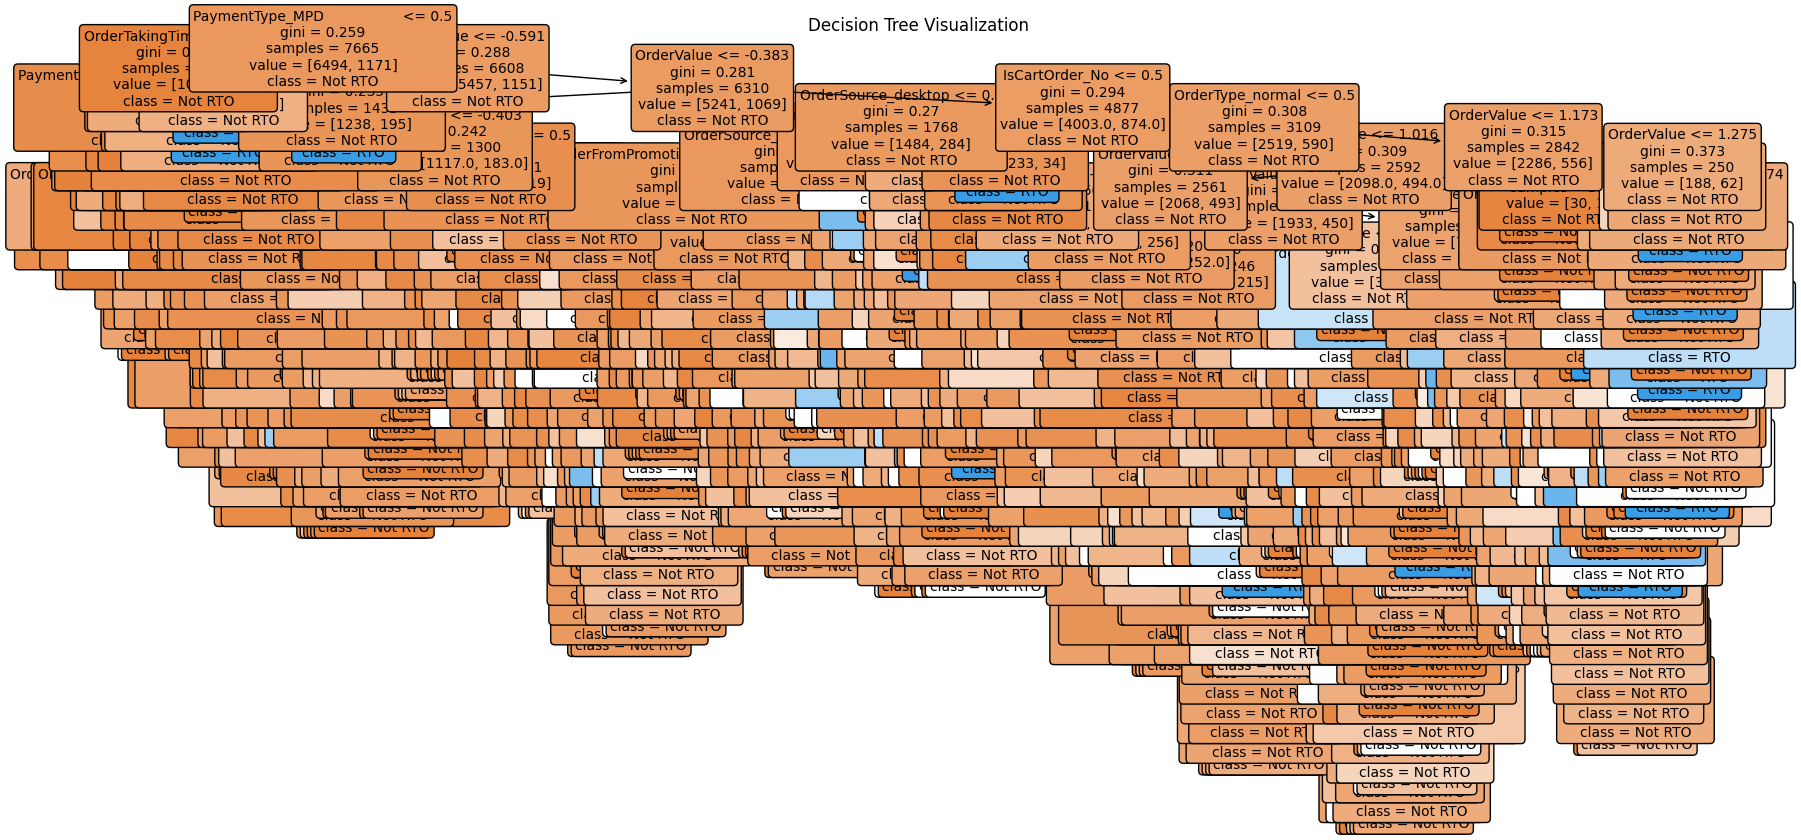

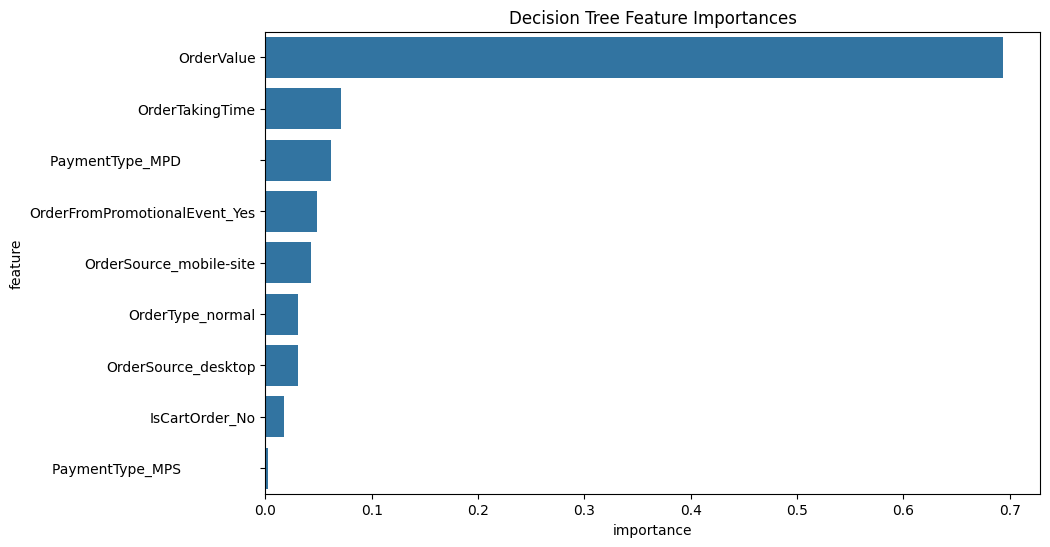

In [46]:
# Visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Not RTO', 'RTO'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Print feature importances
importances = pd.DataFrame({'feature': X_train.columns, 
                          'importance': dt_model.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Decision Tree Feature Importances')
plt.show()


### Random Forest


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1611
           1       0.23      0.07      0.11       306

    accuracy                           0.81      1917
   macro avg       0.54      0.51      0.50      1917
weighted avg       0.75      0.81      0.77      1917



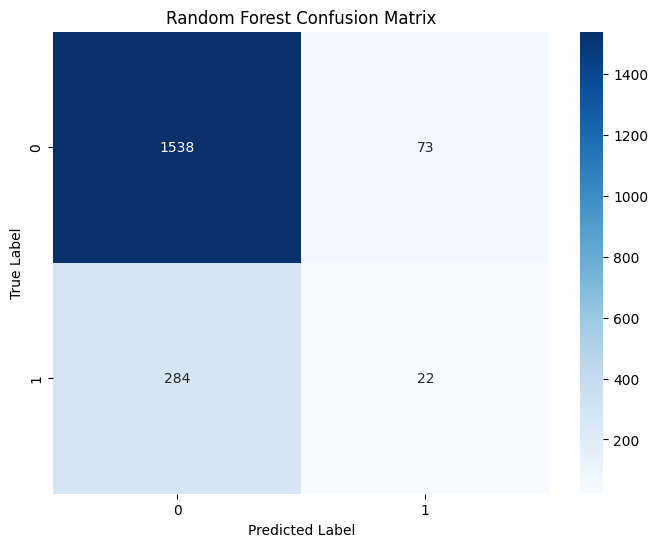

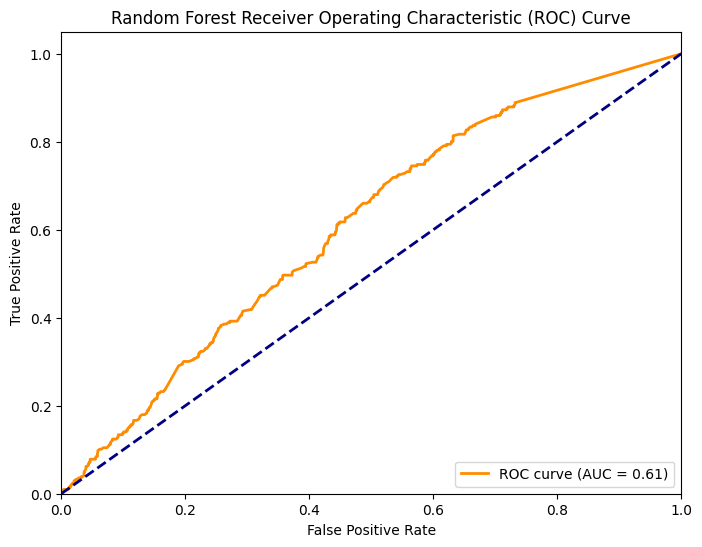

In [47]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This confusion matrix for the Random Forest model shows that it correctly predicted 1538 instances of class 0 (True Negatives) and 22 instances of class 1 (True Positives). It also made some mistakes, with 73 instances of class 0 being incorrectly classified as class 1 (False Positives) and 284 instances of class 1 being incorrectly classified as class 0 (False Negatives). Just like the Decision Tree and KNN models we looked at earlier, this Random Forest model also demonstrates a better ability to predict class 0 compared to class 1, as indicated by the higher number of true negatives and false negatives relative to true positives and false positives.

### XGBoost


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.25      0.01      0.02       306

    accuracy                           0.84      1917
   macro avg       0.55      0.50      0.47      1917
weighted avg       0.75      0.84      0.77      1917



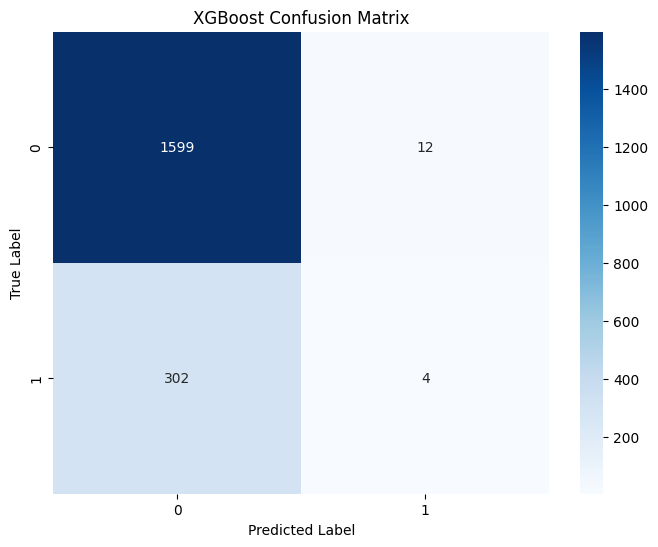

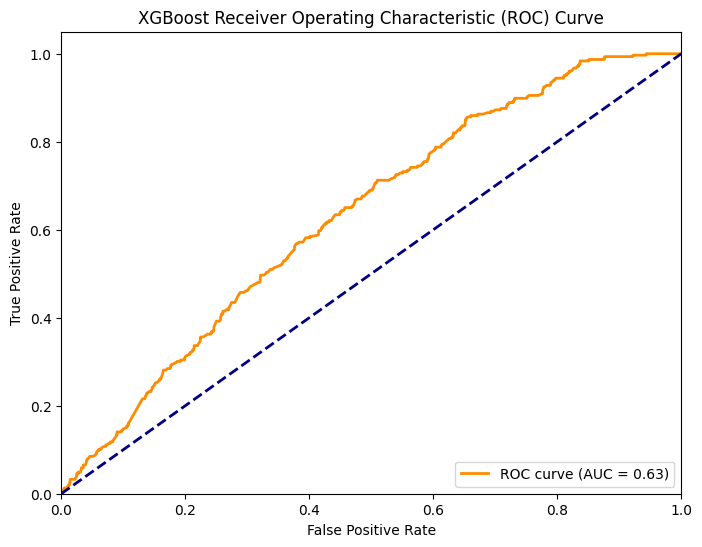

In [48]:
# Import XGBoost classifier
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate and plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This XGBoost confusion matrix reveals that the model accurately predicted 1599 instances of class 0 (True Negatives) and 4 instances of class 1 (True Positives). It also made some errors, misclassifying 12 instances of class 0 as class 1 (False Positives) and 302 instances of class 1 as class 0 (False Negatives). Similar to the previous models, XGBoost demonstrates a better performance in predicting class 0 compared to class 1, shown by the higher count of true negatives and false negatives relative to true positives and false positives. However, when compared to the other models, XGBoost appears to have a higher number of true negatives and a lower number of false positives, suggesting it might be slightly better at correctly identifying the negative class.

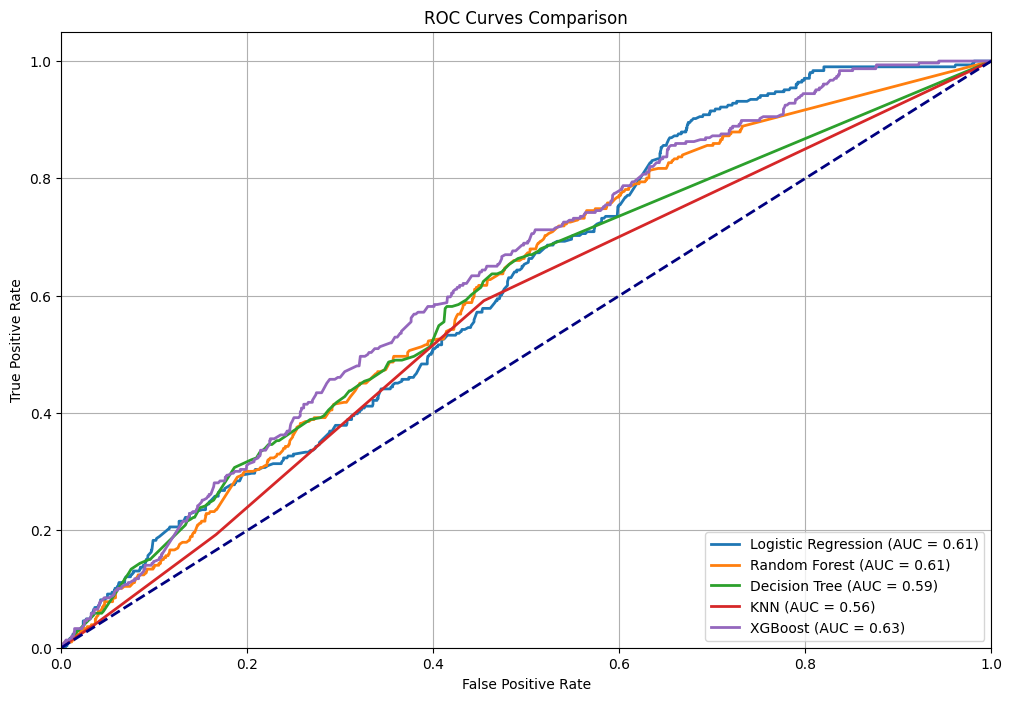

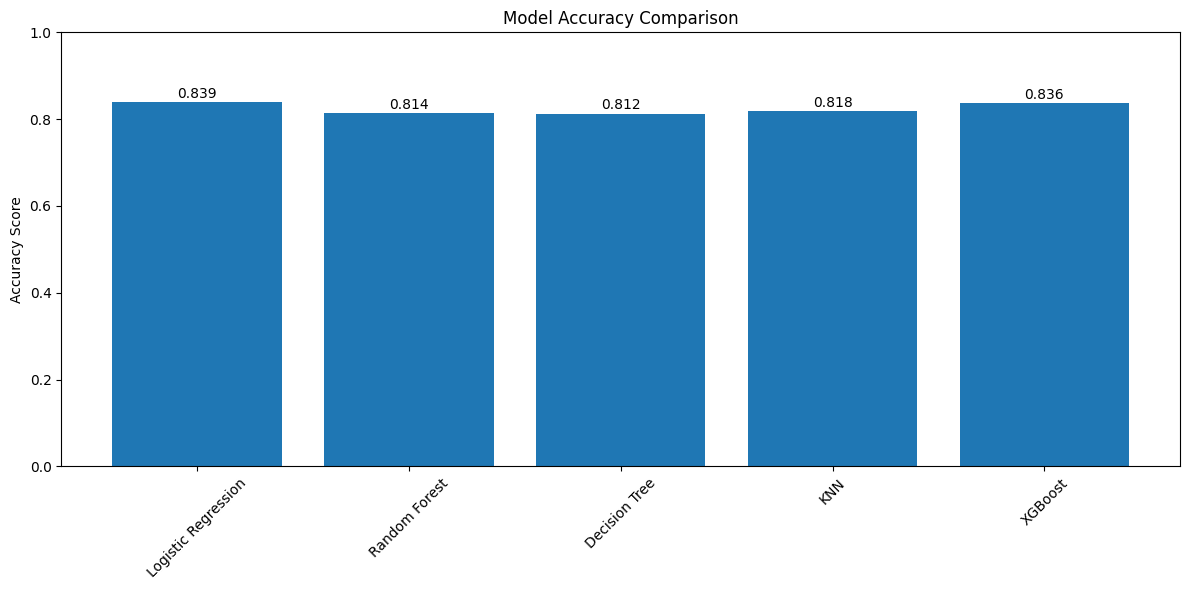

In [49]:
# Import required metrics
from sklearn.metrics import accuracy_score

# Calculate ROC curve metrics for Logistic Regression
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve metrics for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve metrics for Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve metrics for KNN
y_pred_proba_knn = knn_model.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Collect ROC curve data for all models
models_roc = {
    'Logistic Regression': (fpr_lr, tpr_lr, roc_auc_lr),
    'Random Forest': (fpr_rf, tpr_rf, roc_auc_rf), 
    'Decision Tree': (fpr_dt, tpr_dt, roc_auc_dt),
    'KNN': (fpr_knn, tpr_knn, roc_auc_knn),
    'XGBoost': (fpr_xgb, tpr_xgb, roc_auc_xgb)
}

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for model_name, (fpr, tpr, roc_auc) in models_roc.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compare model accuracies
accuracies = {
    'Logistic Regression': accuracy_score(y_test, lr_model.predict(X_test)),
    'Random Forest': accuracy_score(y_test, rf_model.predict(X_test)),
    'Decision Tree': accuracy_score(y_test, dt_model.predict(X_test)),
    'KNN': accuracy_score(y_test, knn_model.predict(X_test)),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()





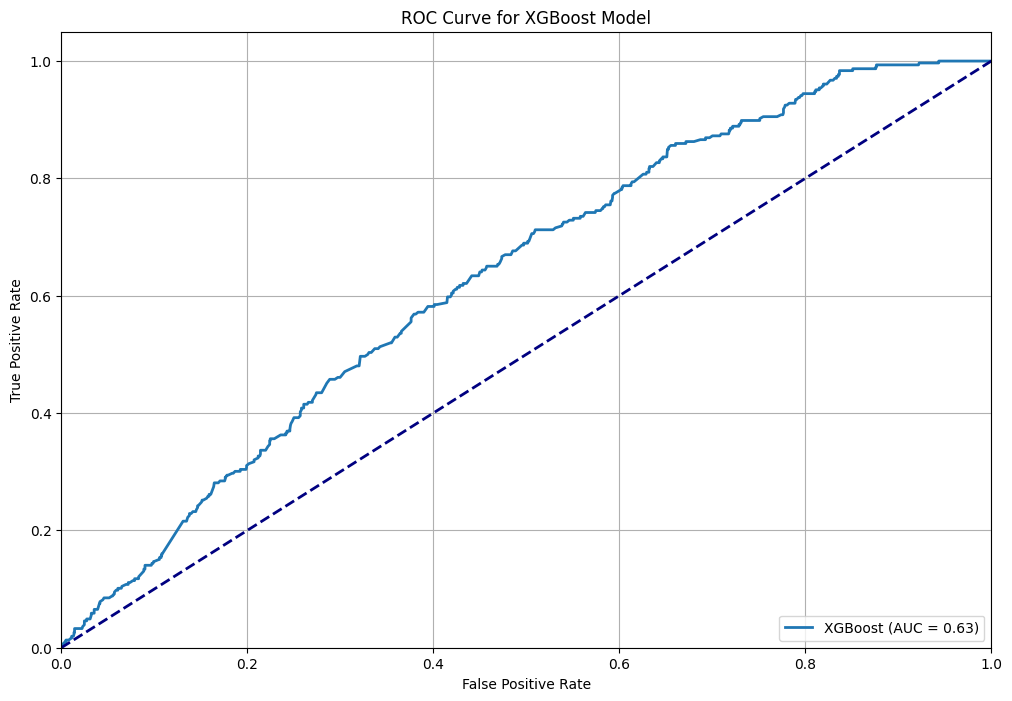

In [50]:
# Plot ROC curve for XGBoost specifically
plt.figure(figsize=(12, 8))
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Model Performance Analysis

ROC Curve Analysis
The ROC (Receiver Operating Characteristic) curve evaluates how well a model separates the positive class (in this case, products that are returned) from the negative class. The Area Under the Curve (AUC) is a useful summary metric: a higher AUC means better distinction between the classes. From your ROC plot:

XGBoost has the highest AUC at 0.63, followed closely by Logistic Regression and Random Forest (both at 0.61).

KNN performs the worst in terms of AUC at 0.56, which is barely better than random guessing (0.5).

Although none of the models exhibit very high AUCs (which might suggest weak separability in the data), XGBoost leads here, indicating it handles the class imbalance or feature interaction slightly better for predicting RTO outcomes.

Accuracy Comparison
Looking at the accuracy plot:

Logistic Regression (83.9%) and XGBoost (83.6%) show the highest overall accuracy.

Random Forest, Decision Tree, and KNN are all slightly lower, in the 81.2–81.8% range.

However, accuracy can be misleading if the classes are imbalanced. For example, if most orders are not returned, a model could achieve high accuracy simply by always predicting “no return,” without actually learning anything meaningful. That’s why the ROC curve (which focuses on true/false positive rates) is crucial.

Considering both metrics, XGBoost emerges as the most appropriate model for predicting RTO. While Logistic Regression has marginally higher accuracy, XGBoost has the best trade-off between sensitivity and specificity, as shown by the highest AUC. This suggests it is more capable of capturing the subtle patterns necessary to distinguish returns from non-returns, even if only slightly better than others. Therefore, XGBoost is recommended, especially if further tuning or feature engineering can improve its performance.

### Summary of the findings

The analysis focused on predicting Return to Origin (RTO) status using various classification models. Initial steps involved data cleaning and feature engineering, removing low-correlation features and creating new ones. Correlation analysis highlighted order type and promotional event response as key predictors of RTO. Model performance varied significantly, with Logistic Regression showing a complete bias towards the majority non-RTO class. KNN showed a slight improvement, while Decision Tree and Random Forest offered the best balance, with Random Forest achieving a better AUC. Although XGBoost results anticipated to perform better. A consistent challenge across all models was the significant class imbalance in the dataset, hindering their ability to accurately detect RTO instances.

### Business Recommendations


Drawing from the data analysis and identified feature importance, two key actionable recommendations emerge to mitigate Return to Origin (RTO) occurrences. Firstly, enhancing pre-order customer intent validation is crucial, particularly for orders originating from promotions or non-cart events, which show a higher possibility for RTO. Implementing supplementary confirmation measures such as OTP or address verification before dispatch, offering "confirm before shipping" options, and clearly communicating cancellation windows can help reduce these instances. 

Secondly, optimizing delivery and communication for high-risk segments is recommended. Proactively engaging customers using payment and delivery methods associated with higher RTO rates (like express delivery or cash on delivery) through reminder calls/SMS and considering strategies like avoiding express shipments for risky users or incentivizing prepaid orders can lead to a decrease in RTO.